In [ ]:
import os
import json
import numpy as np 
import qiskit
from qiskit.circuit.random import random_circuit
from qiskit_aer import AerSimulator

In [2]:
seed = 42
n_qubits = 8
# n_depth = 20
n_depth = 4
shots = 20480

save_folder = "dataset"
output_name = os.path.join(save_folder, "dataset.json")

In [3]:
if os.path.exists(save_folder):
    print(f"This notebook may overwrite previous results in the {save_folder} directory")
else:
    os.makedirs(save_folder)

In [4]:
qc = random_circuit(n_qubits, n_depth, seed=seed, measure=True)
# qc = qc.decompose()

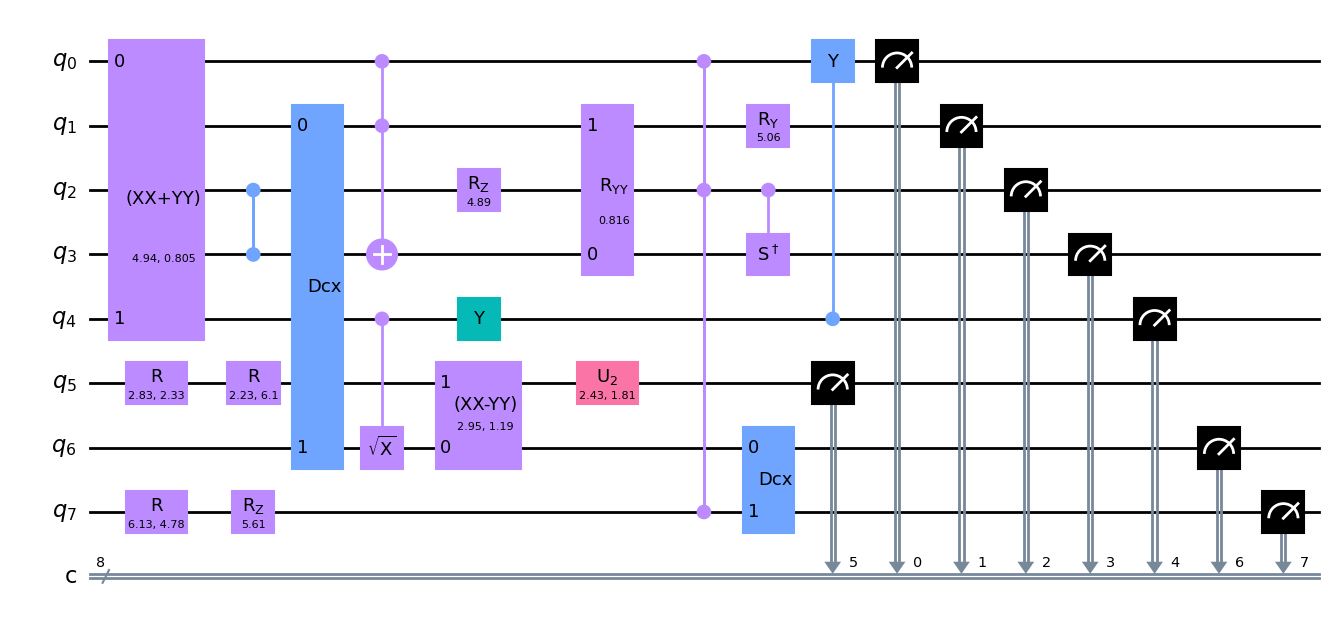

In [5]:
qc.draw(output="mpl", style="clifford")

In [6]:
simulator = AerSimulator()
qct = qiskit.transpile(qc, simulator)

In [7]:
job = simulator.run(qct, shots = shots)
result = job.result()
counts_dict = result.get_counts()

In [8]:
counts_dict

{'00110001': 363,
 '10111011': 941,
 '01011001': 3,
 '10010011': 2485,
 '00011011': 195,
 '10010001': 5040,
 '00010011': 496,
 '10110011': 2426,
 '01111011': 9,
 '01010001': 25,
 '10011001': 494,
 '00010001': 1022,
 '11110011': 2,
 '10110001': 5104,
 '10011011': 940,
 '00011001': 101,
 '00110011': 182,
 '00111011': 51,
 '10111001': 485,
 '00111001': 35,
 '01011011': 6,
 '01110001': 34,
 '01010011': 16,
 '11010001': 3,
 '01110011': 17,
 '01111001': 1,
 '11010011': 1,
 '11011001': 1,
 '11011011': 1,
 '11110001': 1}

In [9]:
with open(output_name, 'w') as f:
    json.dump(counts_dict, f)

In [10]:
counts = np.array(list(counts_dict.values()))
probs = counts / np.sum(counts)
entropy = - np.sum(probs * np.log(probs))
print(entropy)

2.1528342839119117
